<a href="https://colab.research.google.com/github/niloydeb1/MNIST-Classification-Using-Simple-NN/blob/main/MNIST_Fashion_Dataset_Classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with MNIST Fashion Dataset using a simple neural network

## 1. Importing MNIST Dataset.

In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
fashion = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

In [47]:
print("Total Number of Classification Labels :", len(set(y_train)))

Total Number of Classification Labels : 10


## 2. Showing a random sample of image with label.

Image Label : 9


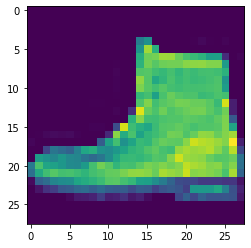

In [39]:
imgIndex = np.random.randint(len(x_train), size=1)[0]
image = x_train[imgIndex]
print("Image Label :", y_train[imgIndex])
plt.imshow(image)

## 3. Show the shape of training and test data.

In [48]:
print("Shape of training data :", np.shape(x_train))
print("Shape of test data :", np.shape(x_test))

Shape of training data : (60000, 28, 28)
Shape of test data : (10000, 28, 28)


## 4. Constructing a neural network model with two hidden layers.

In [41]:
input_shape = [np.shape(x_train)[1], np.shape(x_train)[2]]
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


## 5. Splitting traning data into training and validation sets.

- Taking 5000 of training data as validation set and the rest as training set.
- Training data needs to be normalized. It is divided by 255. Because, (0, 255) is the color values range for grayscale of the image pixels.

In [49]:
training_set_len = int((len(x_train) * 0.95))
x_valid, x_train = x_train[:5000]/255.0, x_train[5000:]/255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
print(len(x_train), len(x_valid), len(y_train), len(y_valid))

55000 5000 55000 5000


## 6. Training the model

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.2261 - accuracy: 0.9189 - val_loss: 0.2137 - val_accuracy: 0.9220
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2220 - accuracy: 0.9203 - val_loss: 0.2258 - val_accuracy: 0.9136
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2178 - accuracy: 0.9208 - val_loss: 0.2145 - val_accuracy: 0.9218
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2140 - accuracy: 0.9232 - val_loss: 0.2213 - val_accuracy: 0.9176
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2100 - accuracy: 0.9245 - val_loss: 0.2139 - val_accuracy: 0.9246
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2058 - accuracy: 0.9264 - val_loss: 0.2105 - val_accuracy: 0.9218
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2036 - accuracy: 0.9268 - val_loss: 0.2129 - val_accuracy

## 7. Make predictions over a few samples.

In [61]:
samples = x_test[:25]
predictions = model.predict(samples)
classes = np.argmax(predictions, axis=1)
print("Predicted Classes :", classes)
print("Actual Classes :", y_test[:25])

1/1 [==============================] - 0s 40ms/step
Predicted Classes : [9 2 1 1 0 1 4 6 5 7 4 5 5 3 4 1 2 4 8 0 2 5 7 5 1]
Actual Classes : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


## 8. Evaluate the Model.

In [55]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1]*100)

Test loss: 61.635650634765625
Test accuracy: 87.11000084877014


## 9. Visualize the model's predictions.

313/313 [==============================] - 1s 2ms/step


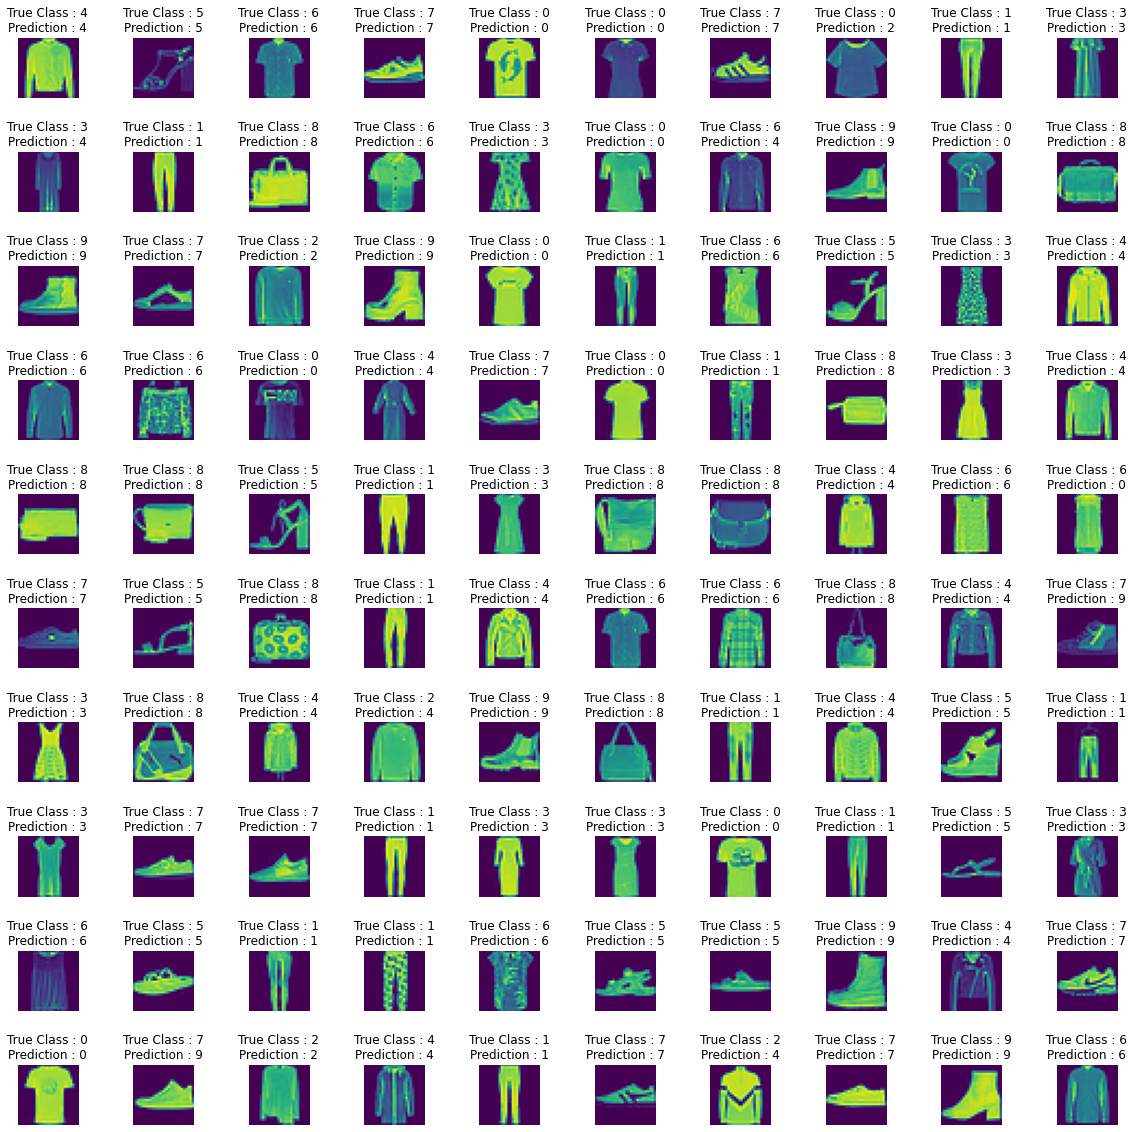

In [57]:
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(20,20))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(y_pred))
    axes[i].imshow(x_test[index].reshape((28,28)))
    axes[i].set_title("True Class : {:0.0f}\nPrediction : {:d}".format(y_test[index], y_pred[index]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9, wspace=0.5)

## 10. Confusion Metrics

Reference: [Confusion Matrix, Accuracy, Precision, Recall, F1 Score](https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd)

<Figure size 576x504 with 0 Axes>

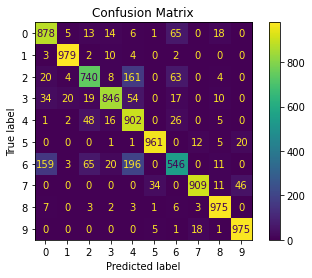

In [75]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

## 11. Classification Report.
### - Accuracy = $\frac{(TN + TP)}{(TN + FP + TP + FN)}$
### - Precision = $\frac{TP}{(TP + FP)}$
### - Recall = $\frac{TP}{(TP + FN)}$
### - F1 Score = $2 * \frac{(Precision * Recall)}{Precision + Recall}$

In [59]:
num_classes = len(set(y_train))
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.80      0.88      0.84      1000
     class 1       0.97      0.98      0.97      1000
     class 2       0.83      0.74      0.78      1000
     class 3       0.92      0.85      0.88      1000
     class 4       0.68      0.90      0.78      1000
     class 5       0.96      0.96      0.96      1000
     class 6       0.75      0.55      0.63      1000
     class 7       0.96      0.91      0.94      1000
     class 8       0.94      0.97      0.96      1000
     class 9       0.94      0.97      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



References:


1.   [Classification with Neural Networks using Python](https://thecleverprogrammer.com/2022/01/10/classification-with-neural-networks-using-python/)
2.   [Fashion MNIST Classification](https://thecleverprogrammer.com/2022/01/10/classification-with-neural-networks-using-python/)